# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [214]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [215]:
!pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [216]:
X = penguins.drop('bill_depth_mm', axis = 1)
y = penguins['bill_depth_mm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [217]:
MSE =[]

In [218]:
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex","island","species"]),
    ("standardize", StandardScaler(), ["flipper_length_mm", "bill_length_mm"])
  ],
  remainder = "drop"
)

In [219]:
pipeline = Pipeline(
  [("preprocessing", ct),
  ("LinearRegression", LinearRegression())]
)

pipeline.fit(X_train, y_train)
predict_trainx = pipeline.predict(X_train)
predict_testx = pipeline.predict(X_test)

In [220]:
mse_test=mean_squared_error(y_test, predict_testx)
mse_train=mean_squared_error(y_train, predict_trainx)
MSE.append({
    "Flexibility": 1,
    "MSE_Train": mse_train,
    "MSE_Test": mse_test
})

In [221]:
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex","island","species"]),
  ],
  remainder = "drop"
)

In [222]:
pipeline2 = Pipeline(
  [("preprocessing", ct),
  ("KNN_3", KNeighborsRegressor(n_neighbors=3))]
)

pipeline2.fit(X_train, y_train)
predict_trainx2 = pipeline2.predict(X_train)
predict_testx2 = pipeline2.predict(X_test)

In [223]:
mse_test2=mean_squared_error(y_test, predict_testx2)
mse_train2=mean_squared_error(y_train, predict_trainx2)
MSE.append({
    "Flexibility": 2,
    "MSE_Train": mse_train2,
    "MSE_Test": mse_test2
})

In [224]:
pipeline3 = Pipeline(
  [("preprocessing", ct),
  ("KNN_7", KNeighborsRegressor(n_neighbors=7))]
)

pipeline3.fit(X_train, y_train)
predict_trainx3 = pipeline3.predict(X_train)
predict_testx3 = pipeline3.predict(X_test)

In [225]:
mse_test3=mean_squared_error(y_test, predict_testx3)
mse_train3=mean_squared_error(y_train, predict_trainx3)
MSE.append({
    "Flexibility": 3,
    "MSE_Train": mse_train3,
    "MSE_Test": mse_test3
})

In [226]:
pipeline4 = Pipeline(
  [("preprocessing", ct),
  ("DecisionTree", DecisionTreeRegressor(max_depth=5))]
)

pipeline4.fit(X_train, y_train)
predict_trainx4 = pipeline4.predict(X_train)
predict_testx4 = pipeline4.predict(X_test)

In [227]:
mse_test4=mean_squared_error(y_test, predict_testx4)
mse_train4=mean_squared_error(y_train, predict_trainx4)
MSE.append({
    "Flexibility": 4,
    "MSE_Train": mse_train4,
    "MSE_Test": mse_test4
})

In [228]:
MSE = pd.DataFrame(MSE)
MSE

,Flexibility,MSE_Train,MSE_Test
0,1,0.635865,0.648490
1,2,0.859344,0.855132
2,3,0.732682,0.685897
3,4,0.681277,0.669820


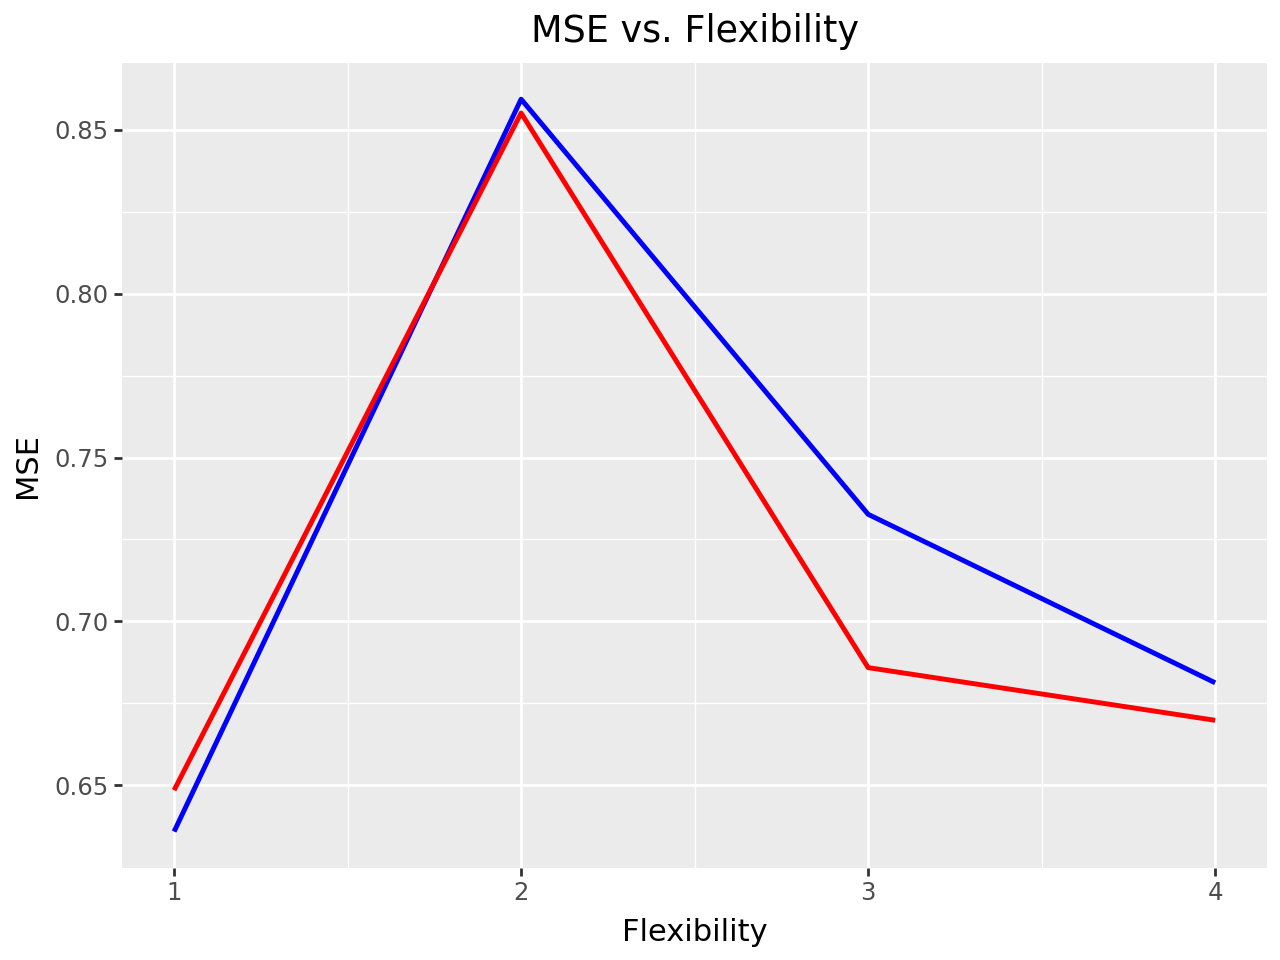

In [229]:
# Assuming df is your DataFrame and 'Flexibility', 'MSE_Train', 'MSE_Test' are column names
from plotnine import ggplot, aes, geom_line, labs
(ggplot(MSE, aes(x='Flexibility'))
    + geom_line(aes(y='MSE_Train'), color='blue', size=1, linetype='solid')
    + geom_line(aes(y='MSE_Test'), color='red', size=1, linetype='solid')
    + labs(x='Flexibility', y='MSE', title='MSE vs. Flexibility')
)

The best model is model 1 which uses a regular linear regression because it has the lowest MSE score.